<a href="https://colab.research.google.com/github/suleatmaca/Diabetic-Retinopathy-Detection-Resnet50-/blob/main/Diabetic_Retinopathy_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"atmacasule","key":"7bdfee09c5724479e4ca38a219d63be8"}'}

In [ ]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


### `Tensorflow 1'i Tensorflow 2'ye geçirmek`

In [ ]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [ ]:
try:
  import tensorflow.compat.v2 as tf
except Exception:
  pass

tf.enable_v2_behavior()

print(tf.__version__)

2.4.1


In [ ]:
!git clone --branch r1.13.0 --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 2927, done.
remote: Counting objects: 100% (2927/2927), done.
remote: Compressing objects: 100% (2428/2428), done.
remote: Total 2927 (delta 505), reused 2108 (delta 424), pack-reused 0
Receiving objects: 100% (2927/2927), 369.04 MiB | 29.56 MiB/s, done.
Resolving deltas: 100% (505/505), done.
Checking out files: 100% (2768/2768), done.


In [ ]:
!tf_upgrade_v2 -h

usage: tf_upgrade_v2 [-h] [--infile INPUT_FILE] [--outfile OUTPUT_FILE]
                     [--intree INPUT_TREE] [--outtree OUTPUT_TREE]
                     [--copyotherfiles COPY_OTHER_FILES] [--inplace]
                     [--import_rename] [--reportfile REPORT_FILENAME]
                     [--mode {DEFAULT,SAFETY}] [--print_all]

Convert a TensorFlow Python file from 1.x to 2.0

Simple usage:
  tf_upgrade_v2.py --infile foo.py --outfile bar.py
  tf_upgrade_v2.py --infile foo.ipynb --outfile bar.ipynb
  tf_upgrade_v2.py --intree ~/code/old --outtree ~/code/new

optional arguments:
  -h, --help            show this help message and exit
  --infile INPUT_FILE   If converting a single file, the name of the file to
                        convert
  --outfile OUTPUT_FILE
                        If converting a single file, the output filename.
  --intree INPUT_TREE   If converting a whole tree of files, the directory to
                        read from (relative or absolute).
  --ou

In [ ]:
!head -n 65 models/samples/cookbook/regression/custom_regression.py | tail -n 10

  # Calculate loss using mean squared error
  average_loss = tf.losses.mean_squared_error(labels, predictions)

  # Pre-made estimators use the total_loss instead of the average,
  # so report total_loss for compatibility.
  batch_size = tf.shape(labels)[0]
  total_loss = tf.to_float(batch_size) * average_loss

  if mode == tf.estimator.ModeKeys.TRAIN:
    optimizer = params.get("optimizer", tf.train.AdamOptimizer)


In [ ]:
!(cd models/samples/cookbook/regression && python custom_regression.py)

2021-03-29 12:00:13.530004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Traceback (most recent call last):
  File "custom_regression.py", line 162, in <module>
    tf.logging.set_verbosity(tf.logging.INFO)
AttributeError: module 'tensorflow' has no attribute 'logging'


In [ ]:
!tf_upgrade_v2 \
  --infile models/samples/cookbook/regression/custom_regression.py \
  --outfile /tmp/custom_regression_v2.py

INFO line 38:8: Renamed 'tf.feature_column.input_layer' to 'tf.compat.v1.feature_column.input_layer'
INFO line 43:10: Renamed 'tf.layers.dense' to 'tf.compat.v1.layers.dense'
INFO line 46:17: Renamed 'tf.layers.dense' to 'tf.compat.v1.layers.dense'
INFO line 57:17: tf.losses.mean_squared_error requires manual check. tf.losses have been replaced with object oriented versions in TF 2.0 and after. The loss function calls have been converted to compat.v1 for backward compatibility. Please update these calls to the TF 2.0 versions.
INFO line 57:17: Renamed 'tf.losses.mean_squared_error' to 'tf.compat.v1.losses.mean_squared_error'
INFO line 61:15: Added keywords to args of function 'tf.shape'
INFO line 62:15: Changed tf.to_float call to tf.cast(..., dtype=tf.float32).
INFO line 65:40: Renamed 'tf.train.AdamOptimizer' to 'tf.compat.v1.train.AdamOptimizer'
INFO line 68:39: Renamed 'tf.train.get_global_step' to 'tf.compat.v1.train.get_global_step'
INFO line 83:9: tf.metrics.root_mean_squared_er

In [ ]:
# upgrade the .py files and copy all the other files to the outtree
!tf_upgrade_v2 \
    --intree models/samples/cookbook/regression/ \
    --outtree regression_v2/ \
    --reportfile tree_report.txt

INFO line 82:10: tf.estimator.LinearRegressor: Default value of loss_reduction has been changed to SUM_OVER_BATCH_SIZE; inserting old default value tf.keras.losses.Reduction.SUM.

INFO line 105:2: Renamed 'tf.logging.set_verbosity' to 'tf.compat.v1.logging.set_verbosity'
INFO line 105:27: Renamed 'tf.logging.INFO' to 'tf.compat.v1.logging.INFO'
INFO line 106:2: Renamed 'tf.app.run' to 'tf.compat.v1.app.run'
INFO line 72:10: tf.estimator.DNNRegressor: Default value of loss_reduction has been changed to SUM_OVER_BATCH_SIZE; inserting old default value tf.keras.losses.Reduction.SUM.

INFO line 96:2: Renamed 'tf.logging.set_verbosity' to 'tf.compat.v1.logging.set_verbosity'
INFO line 96:27: Renamed 'tf.logging.INFO' to 'tf.compat.v1.logging.INFO'
INFO line 97:2: Renamed 'tf.app.run' to 'tf.compat.v1.app.run'
INFO line 38:8: Renamed 'tf.feature_column.input_layer' to 'tf.compat.v1.feature_column.input_layer'
INFO line 43:10: Renamed 'tf.layers.dense' to 'tf.compat.v1.layers.dense'
INFO line

In [ ]:
!(cd regression_v2 && python custom_regression.py 2>&1) | tail

I0329 12:00:37.491260 140234308855680 estimator.py:2066] Saving dict for global step 1000: global_step = 1000, loss = 316.6671, rmse = 2.5685077
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp7k87t2_8/model.ckpt-1000
I0329 12:00:37.539990 140234308855680 estimator.py:2127] Saving 'checkpoint_path' summary for global step 1000: /tmp/tmp7k87t2_8/model.ckpt-1000
Tensor("IteratorGetNext:25", shape=(None,), dtype=float64, device=/device:CPU:0)
Tensor("Squeeze:0", shape=(None,), dtype=float32)

********************************************************************************

RMS error for the test set: $2569



In [ ]:
!head -n 20 tree_report.txt


TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 7 files
Detected 1 issues that require attention
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
File: models/samples/cookbook/regression/automobile_data.py
--------------------------------------------------------------------------------
models/samples/cookbook/regression/automobile_data.py:125:15: WARNING: Changing dataset.make_one_shot_iterator() to tf.compat.v1.data.make_one_shot_iterator(dataset). Please check this transformation.

Detailed log follows:

Input tree: 'models/samples/cookbook/regression/'
--------------------------------------------------------------------------------
Processing file 'models/samples/cookbook/regression/linear_regression_categorical.py'
 outputting to 'regression_v2/linear_regression_categorical.py'


In [ ]:
%%writefile dropout.py
import tensorflow as tf

d = tf.nn.dropout(tf.range(10), 0.2)
z = tf.zeros_like(d, optimize=False)

Writing dropout.py


In [ ]:
!tf_upgrade_v2 \
  --infile dropout.py \
  --outfile dropout_v2.py \
  --reportfile dropout_report.txt > /dev/null

In [ ]:
!cat dropout_report.txt

TensorFlow 2.0 Upgrade Script
-----------------------------
Converted 1 files
Detected 0 issues that require attention
--------------------------------------------------------------------------------
Detailed log follows:

--------------------------------------------------------------------------------
Processing file 'dropout.py'
 outputting to 'dropout_v2.py'
--------------------------------------------------------------------------------

3:4: INFO: Changing keep_prob arg of tf.nn.dropout to rate, and recomputing value.

4:4: INFO: Renaming tf.zeros_like to tf.compat.v1.zeros_like because argument optimize is present. tf.zeros_like no longer takes an optimize argument, and behaves as if optimize=True. This call site specifies something other than optimize=True, so it was converted to compat.v1.
--------------------------------------------------------------------------------



In [ ]:
!cat dropout_v2.py

import tensorflow as tf

d = tf.nn.dropout(tf.range(10), 1 - (0.2))
z = tf.compat.v1.zeros_like(d, optimize=False)

In [ ]:
!tf_upgrade_v2 \
    --intree models/research/deeplab \
    --outtree deeplab_v2 \
    --reportfile deeplab_report.txt > /dev/null

In [ ]:
!ls deeplab_v2

common.py	    eval.py		 local_test_mobilenetv2.sh  train.py
common_test.py	    export_model.py	 local_test.sh		    utils
core		    g3doc		 model.py		    vis.py
datasets	    __init__.py		 model_test.py
deeplab_demo.ipynb  input_preprocess.py  README.md


In [ ]:
!cat deeplab_report.txt | grep -i models/research/deeplab | grep -i error | head -n 3

models/research/deeplab/datasets/segmentation_dataset.py:55:7: ERROR: Using member tf.contrib.slim in deprecated module tf.contrib. tf.contrib.slim cannot be converted automatically. tf.contrib will not be distributed with TensorFlow 2.0, please consider an alternative in non-contrib TensorFlow, a community-maintained repository such as tensorflow/addons, or fork the required code.
models/research/deeplab/core/resnet_v1_beta_test.py:30:7: ERROR: Using member tf.contrib.slim in deprecated module tf.contrib. tf.contrib.slim cannot be converted automatically. tf.contrib will not be distributed with TensorFlow 2.0, please consider an alternative in non-contrib TensorFlow, a community-maintained repository such as tensorflow/addons, or fork the required code.
models/research/deeplab/core/feature_extractor.py:26:7: ERROR: Using member tf.contrib.slim in deprecated module tf.contrib. tf.contrib.slim cannot be converted automatically. tf.contrib will not be distributed with TensorFlow 2.0, ple

In [ ]:
!cat dropout.py

import tensorflow as tf

d = tf.nn.dropout(tf.range(10), 0.2)
z = tf.zeros_like(d, optimize=False)

In [ ]:
!tf_upgrade_v2 --mode SAFETY --infile dropout.py --outfile dropout_v2_safe.py > /dev/null

In [ ]:
!cat dropout_v2_safe.py

import tensorflow.compat.v1 as tf

d = tf.nn.dropout(tf.range(10), 0.2)
z = tf.zeros_like(d, optimize=False)

### **devam**

In [ ]:
import tensorflow.compat.v1 as tf


In [ ]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, cohen_kappa_score
from keras.models import Model
from keras import optimizers, applications
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input


# Set seeds to make the experiment more reproducible.
#from tensorflow import set_random_seed
import tensorflow as tf
#tf.random.set_seed(1) 
import tensorflow

def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    #set_random_seed(0)
    tf.random.set_seed(0)
seed_everything()

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

# **Load data**

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/test.csv')

# **EDA**


## Data overview

In [ ]:
print('Number of train samples: ', train.shape[0])
print('Number of test samples: ', test.shape[0])
display(train.head())

Number of train samples:  3662
Number of test samples:  1928


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


Label class distribution


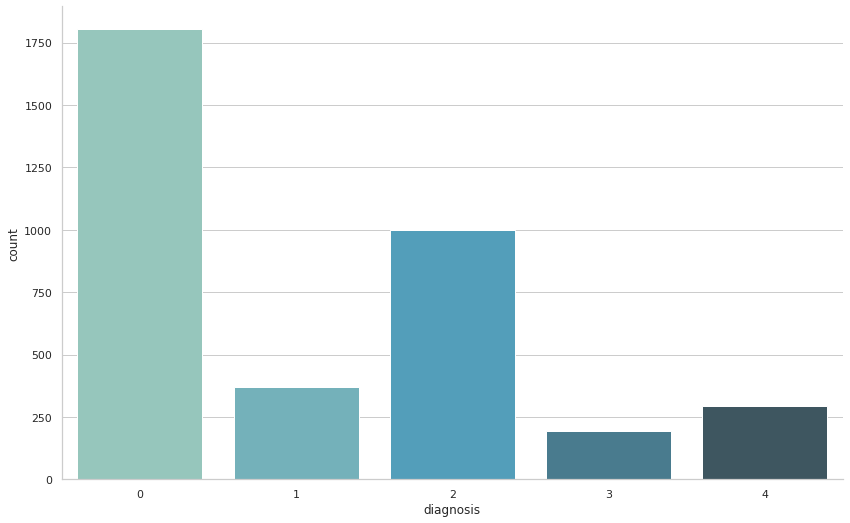

In [ ]:
f, ax = plt.subplots(figsize=(14, 8.7))
ax = sns.countplot(x="diagnosis", data=train, palette="GnBu_d")
sns.despine()
plt.show()


## Şimdi bazı resimlere bakalım

Görüntüler farklı boyutlara sahip, yeniden boyutlandırma veya bazı dolgu malzemeleri gerekebilir.

TypeError: ignored

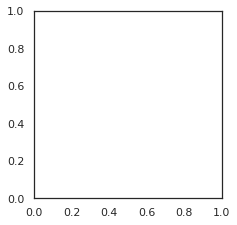

In [ ]:

sns.set_style("white")
count = 1
plt.figure(figsize=[20, 20])
for img_name in train['id_code'][:15]:
    img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Dataset/train/%s.png' % img_name)[[...,2, 1, 0]]
    plt.subplot(5, 5, count)
    plt.imshow(img)
    plt.title("Image %s" % count)
    count += 1
    
plt.show()

In [ ]:
BATCH_SIZE = 15
EPOCHS = 20
WARMUP_EPOCHS = 4
LEARNING_RATE = 1e-4
WARMUP_LEARNING_RATE = 1e-3
HEIGHT = 512
WIDTH = 512
CANAL = 3
N_CLASSES = train['diagnosis'].nunique()
ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5

In [ ]:
train["id_code"] = train["id_code"].apply(lambda x: x + ".png")
test["id_code"] = test["id_code"].apply(lambda x: x + ".png")
train['diagnosis'] = train['diagnosis'].astype('str')
train.head()

,id_code,diagnosis
0,000c1434d8d7.png,2
1,001639a390f0.png,4
2,0024cdab0c1e.png,1
3,002c21358ce6.png,0
4,005b95c28852.png,0


In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255, 
                                 validation_split=0.2,
                                 horizontal_flip=True)

train_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/content/gdrive/My Drive/Colab Notebooks/Dataset/train",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    target_size=(HEIGHT, WIDTH),
    subset='training')

valid_generator=train_datagen.flow_from_dataframe(
    dataframe=train,
    directory="/content/gdrive/My Drive/Colab Notebooks/Dataset/train",
    x_col="id_code",
    y_col="diagnosis",
    batch_size=BATCH_SIZE,
    class_mode="categorical",    
    target_size=(HEIGHT, WIDTH),
    subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(  
        dataframe=test,
        directory = "/content/gdrive/My Drive/Colab Notebooks/Dataset/test",
        x_col="id_code",
        target_size=(HEIGHT, WIDTH),
        batch_size=1,
        shuffle=False,
        class_mode=None)

Found 2337 validated image filenames belonging to 5 classes.
Found 584 validated image filenames belonging to 5 classes.
Found 1928 validated image filenames.


In [ ]:
!pip install -q pyyaml h5py

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os

import tensorflow as tf
from tensorflow import keras

In [ ]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = applications.ResNet50(weights=None, 
                                       include_top=False,
                                       input_tensor=input_tensor)
    base_model.load_weights('/content/gdrive/My Drive/Colab Notebooks/Dataset/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)
    
    return model

## **tensorflow 2 ye güncelleyince gelen hatayı düzelttik**

In [ ]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

### **devam.**

In [ ]:
model = create_model(input_shape=(HEIGHT, WIDTH, CANAL), n_out=N_CLASSES)

for layer in model.layers:
    layer.trainable = False

for i in range(-5, 0):
    model.layers[i].trainable = True

metric_list = ["accuracy"]
optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE)
model.compile(optimizer=optimizer, loss="categorical_crossentropy",  metrics=metric_list)
model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256     

### **Üst katmanları eğitin**

In [ ]:
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size

history_warmup = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=WARMUP_EPOCHS,
                              verbose=1).history

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/4
155/155 [==============================] - 1606s 10s/step - loss: 2.4627 - acc: 0.6173 - val_loss: 4.9758 - val_acc: 0.3895
Epoch 2/4
155/155 [==============================] - 625s 4s/step - loss: 0.8823 - acc: 0.6814 - val_loss: 4.1209 - val_acc: 0.3937
Epoch 3/4
155/155 [==============================] - 769s 5s/step - loss: 0.7925 - acc: 0.6984 - val_loss: 4.1794 - val_acc: 0.3796
Epoch 4/4
155/155 [==============================] - 755s 5s/step - loss: 0.7672 - acc: 0.7059 - val_loss: 5.4379 - val_acc: 0.3989


## **Tüm modele ince ayar yapın**

In [ ]:
for layer in model.layers:
    layer.trainable = True

es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es, rlrop]
optimizer = optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss="binary_crossentropy",  metrics=metric_list)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 512, 512, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 518, 518, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 256, 256, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 256, 256, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

In [ ]:
history_finetunning = model.fit_generator(generator=train_generator,
                              steps_per_epoch=STEP_SIZE_TRAIN,
                              validation_data=valid_generator,
                              validation_steps=STEP_SIZE_VALID,
                              epochs=EPOCHS,
                              callbacks=callback_list,
                              verbose=1).history

Epoch 1/20
155/155 [==============================] - 713s 5s/step - loss: 0.2363 - acc: 0.9000 - val_loss: 0.2712 - val_acc: 0.8649
Epoch 2/20
155/155 [==============================] - 625s 4s/step - loss: 0.1975 - acc: 0.9152 - val_loss: 0.2524 - val_acc: 0.8840
Epoch 3/20
155/155 [==============================] - 784s 5s/step - loss: 0.1711 - acc: 0.9258 - val_loss: 0.2151 - val_acc: 0.9114
Epoch 4/20
155/155 [==============================] - 750s 5s/step - loss: 0.1556 - acc: 0.9360 - val_loss: 0.2308 - val_acc: 0.9058
Epoch 5/20
155/155 [==============================] - 714s 5s/step - loss: 0.1395 - acc: 0.9435 - val_loss: 0.4137 - val_acc: 0.8794
Epoch 6/20
155/155 [==============================] - 694s 4s/step - loss: 0.1321 - acc: 0.9457 - val_loss: 0.2221 - val_acc: 0.9153

Epoch 00006: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
Epoch 7/20
155/155 [==============================] - 682s 4s/step - loss: 0.0951 - acc: 0.9626 - val_loss: 0.2072 - val_

### **Model loss grafiği**

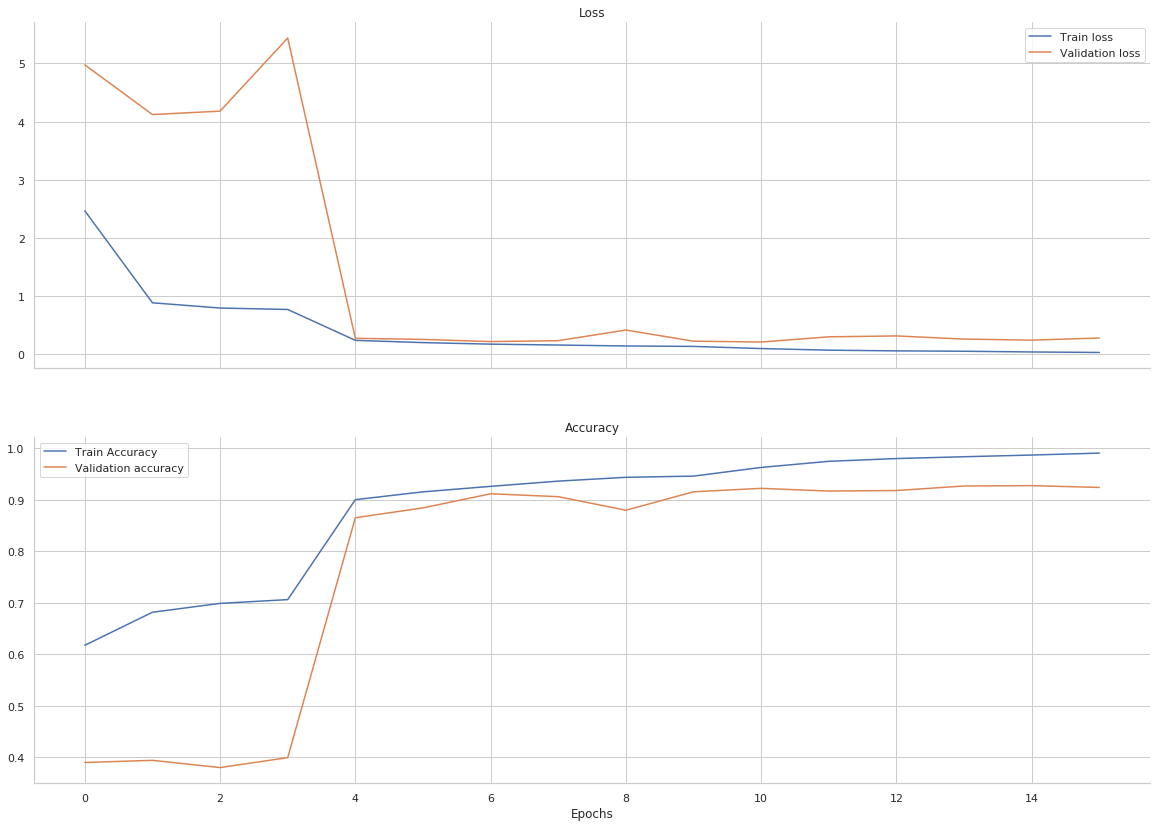

In [ ]:
history = {'loss': history_warmup['loss'] + history_finetunning['loss'], 
           'val_loss': history_warmup['val_loss'] + history_finetunning['val_loss'], 
           'acc': history_warmup['acc'] + history_finetunning['acc'], 
           'val_acc': history_warmup['val_acc'] + history_finetunning['val_acc']}

sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(2, 1, sharex='col', figsize=(20, 14))

ax1.plot(history['loss'], label='Train loss')
ax1.plot(history['val_loss'], label='Validation loss')
ax1.legend(loc='best')
ax1.set_title('Loss')

ax2.plot(history['acc'], label='Train Accuracy')
ax2.plot(history['val_acc'], label='Validation accuracy')
ax2.legend(loc='best')
ax2.set_title('Accuracy')

plt.xlabel('Epochs')
sns.despine()
plt.show()

### MODEL DEĞERLENDİRME

In [ ]:
complete_datagen = ImageDataGenerator(rescale=1./255)
complete_generator = complete_datagen.flow_from_dataframe(  
        dataframe=train,
        directory = "/content/gdrive/My Drive/Colab Notebooks/Dataset/train",
        x_col="id_code",
        target_size=(HEIGHT, WIDTH),
        batch_size=1,
        shuffle=False,
        class_mode=None)

STEP_SIZE_COMPLETE = complete_generator.n//complete_generator.batch_size
train_preds = model.predict_generator(complete_generator, steps=STEP_SIZE_COMPLETE)
train_preds = [np.argmax(pred) for pred in train_preds]

Found 2921 validated image filenames.


**Confusion Matrix**

In [ ]:
labels = ['0 - No DR', '1 - Mild', '2 - Moderate', '3 - Severe', '4 - Proliferative DR']
cnf_matrix = confusion_matrix(train['diagnosis'].astype('int'), train_preds)
cnf_matrix_norm = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]
df_cm = pd.DataFrame(cnf_matrix_norm, index=labels, columns=labels)
plt.figure(figsize=(16, 7))
sns.heatmap(df_cm, annot=True, fmt='.2f', cmap="Blues")
plt.show()

**Quadratic Weighted Kappa**

In [ ]:
print("Train Cohen Kappa score: %.3f" % cohen_kappa_score(train_preds, train['diagnosis'].astype('int'), weights='quadratic'))

**Modeli test seti ve çıktı tahminlerine uygulama**

In [ ]:
test_generator.reset()
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
preds = model.predict_generator(test_generator, steps=STEP_SIZE_TEST)
predictions = [np.argmax(pred) for pred in preds]

In [ ]:
filenames = test_generator.filenames
results = pd.DataFrame({'id_code':filenames, 'diagnosis':predictions})
results['id_code'] = results['id_code'].map(lambda x: str(x)[:-4])
results.to_csv('submission.csv',index=False)
results.head(10)

,id_code,diagnosis
0,0005cfc8afb6,2
1,003f0afdcd15,2
2,006efc72b638,2
3,00836aaacf06,2
4,009245722fa4,2
5,009c019a7309,4
6,010d915e229a,3
7,0111b949947e,2
8,01499815e469,3
9,0167076e7089,0


**Tahminler sınıf dağılımı**

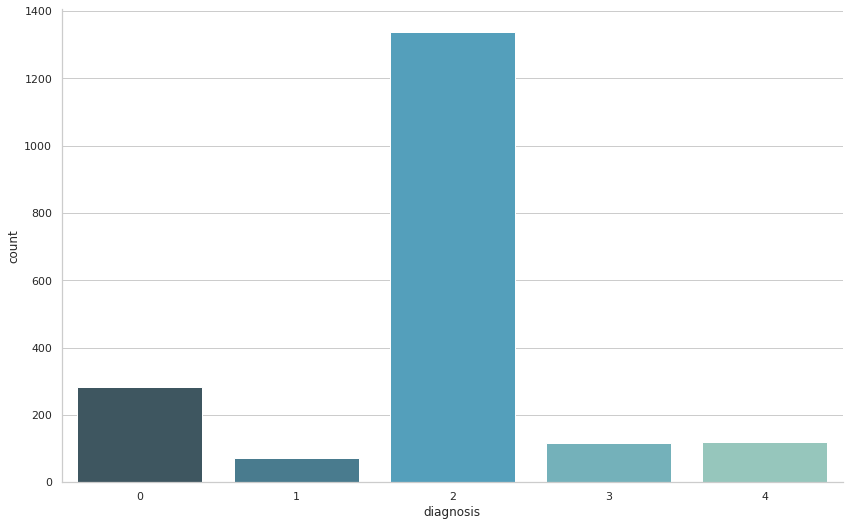

In [ ]:
f, ax = plt.subplots(figsize=(14, 8.7))
ax = sns.countplot(x="diagnosis", data=results, palette="GnBu_d")
sns.despine()
plt.show()